- Válassz ki egy olyan adatbázist a bit.uni-corvinus.hu-n, amelynek tartalmához hozzáférsz
- Az adatbázison belül válassz ki egy táblát!
- Valósíts meg tipikus adatprofilozási lekérdezéseket a tábla legalább 2 oszlopára (min. 3 db / oszlop)!
- Pl: NULL értékek száma, százalékos aránya, legkisebb/legnagyobb érték, kiugró értékek, min/max/átlag, értékek eloszlása stb.
- A kapott eredményekhez diagramokat is készíthetsz
- Az megoldást ide töltsd fel csatolva, vagy GitHub-ra a repo link megadásával (utóbbi esetben +5%)
- A feladatot egyénileg kell megoldani!

In [6]:
SELECT MIN(LEN(szallas_nev)) AS string_length_min, 
       MAX(LEN(szallas_nev)) AS string_length_max, 
       AVG(LEN(szallas_nev)) AS string_length_avg

FROM szallashely
WHERE szallas_nev IS NOT NULL
AND LEN(SZALLAS_NEV) > 0

(1 row affected)

Total execution time: 00:00:00.015

string_length_min,string_length_max,string_length_avg
8,20,14


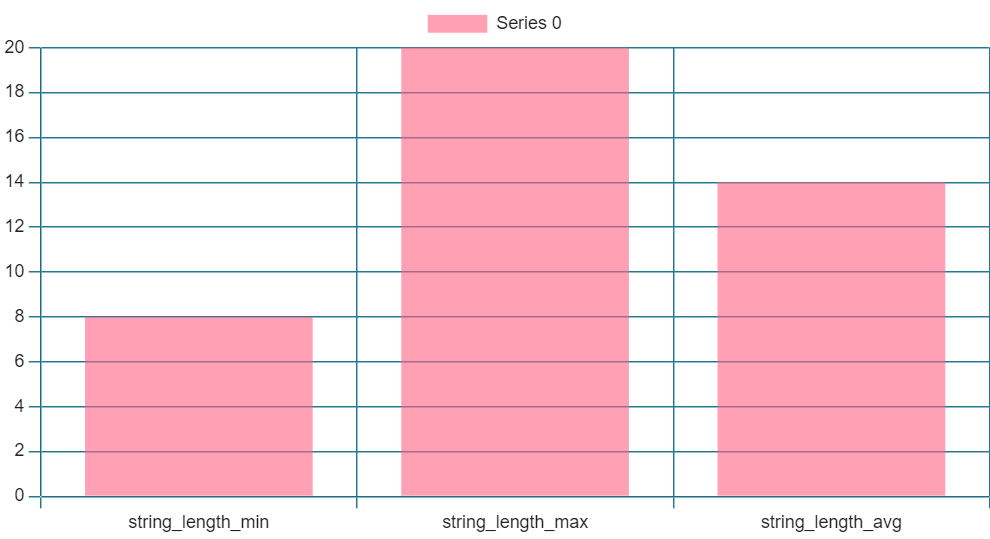

In [13]:
SELECT AVG(LEN(szallas_nev)) AS string_length_avg, 
       STDEV(LEN(szallas_nev)) AS string_length_stddev, 
       VAR(LEN(szallas_nev)) AS string_length_var
FROM szallashely
WHERE szallas_nev IS NOT NULL
AND LEN(SZALLAS_NEV) > 0

(1 row affected)

Total execution time: 00:00:00.031

string_length_avg,string_length_stddev,string_length_var
14,"3,2630689615175217","10,647619047619036"


In [15]:
DECLARE 
@min int = 2,
@max int = 4;   

SELECT 
    SUM(CASE WHEN CSILLAGOK_SZAMA < @min THEN 1 ELSE 0 end) AS below_range,
    SUM(CASE WHEN CSILLAGOK_SZAMA BETWEEN @min and @max THEN 1 ELSE 0 end) AS within_range,
    SUM(CASE WHEN CSILLAGOK_SZAMA > @max THEN 1 ELSE 0 end) AS above_range
FROM szallashely

(1 row affected)

Total execution time: 00:00:00.024

below_range,within_range,above_range
10,11,0


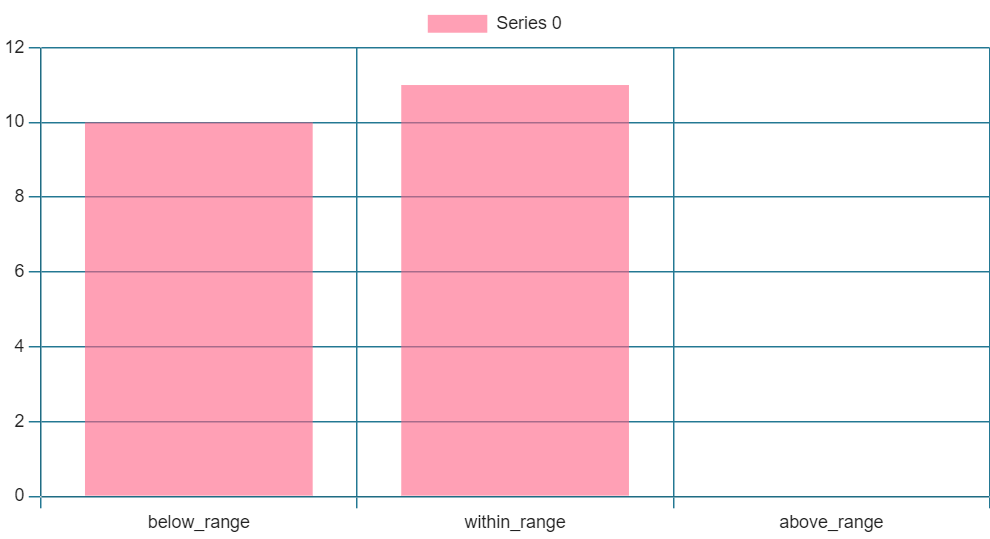

In [17]:
SELECT row_type,
    COUNT(*) row_count
FROM 
    (SELECT 
        CASE WHEN ROGZ_IDO IS NULL THEN 'Null'
            ELSE 'Non Empty' 
            END AS row_type
        FROM szallashely) rows
GROUP BY row_type

(1 row affected)

Total execution time: 00:00:00.033

row_type,row_count
Non Empty,21


In [19]:
SELECT row_type, 
    SUM(row_count) AS row_count
FROM
    (SELECT 
        CASE WHEN [value] IS NULL then 'NULL'
            WHEN row_count = 1 then 'Unique'
            ELSE 'Non Unique' 
            END AS row_type,
        row_count
    FROM (
        SELECT ROGZ_IDO [value], 
            COUNT(*) row_count
        FROM szallashely
        GROUP BY ROGZ_IDO) X) Y
GROUP BY row_type

(2 rows affected)

Total execution time: 00:00:00.037

row_type,row_count
Non Unique,8
Unique,13


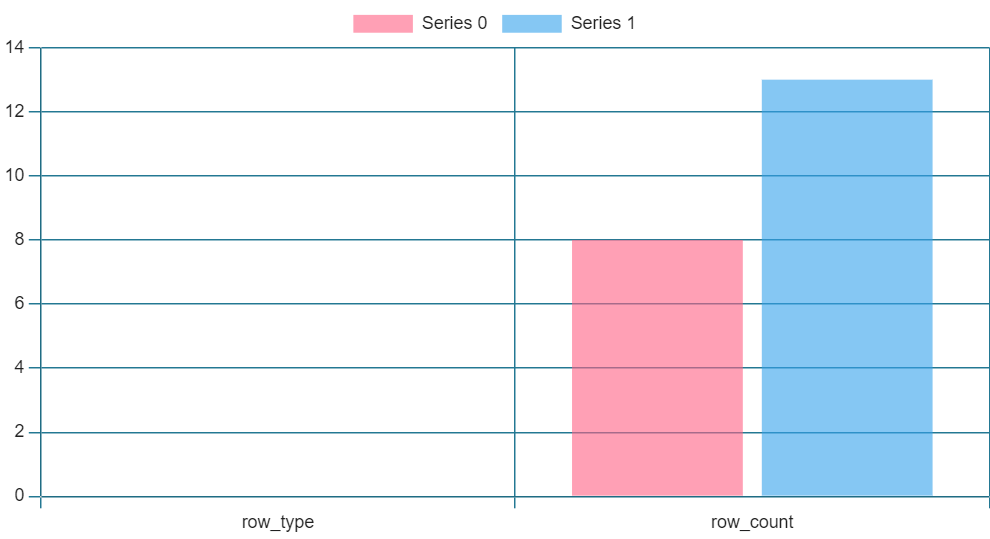